In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
'''
Читаем изображения
------------------
img - исходное изображение
templ - шаблон который необходимо найти
'''

#img = cv2.imread('main_photo.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('main_photo.jpg', cv2.IMREAD_GRAYSCALE)
#img = cv2.bitwise_not(img)
# Получение размеров изображения
height, width = img.shape[:2]

# Вывод размеров изображения
print(f"Высота изображения: {height}, Ширина изображения: {width}")

templ = cv2.imread('traf.jpg',cv2.IMREAD_GRAYSCALE)
templ = cv2.bitwise_not(templ)
# Получение размеров изображения
height, width = templ.shape[:2]

# Вывод размеров изображения
print(f"Высота изображения: {height}, Ширина изображения: {width}")
#gray_image_2 = cv2.bitwise_not(img)

Высота изображения: 1280, Ширина изображения: 576
Высота изображения: 424, Ширина изображения: 61


(array([636]), array([105]))


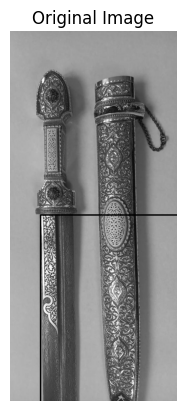

In [7]:
w, h = img.shape[::-1]

image_dispaly = img.copy()

#cv2.TM_SQDIFF = 0
#result = cv2.matchTemplate(image_dispaly, templ, cv2.TM_SQDIFF)
#cv2.TM_SQDIFF_NORMED = 1
#result = cv2.matchTemplate(image_dispaly, templ, cv2.TM_SQDIFF_NORMED)
#cv2.TM_CCORR = 2
#result = cv2.matchTemplate(image_dispaly, templ, cv2.TM_CCORR)
#cv2.TM_CCORR_NORMED = 3
#result = cv2.matchTemplate(image_dispaly, templ, cv2.TM_CCORR_NORMED)
#cv2.TM_CCOEFF = 4
#result = cv2.matchTemplate(image_dispaly, templ, cv2.TM_CCOEFF)
#cv2.TM_CCOEFF_NORMED = 5
result = cv2.matchTemplate(image_dispaly, templ, cv2.TM_CCOEFF_NORMED)

loc = np.where(result >= 0.8)
print(loc)
for pt in zip(*loc[::-1]):
    cv2.rectangle(image_dispaly, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(image_dispaly, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()



In [8]:
'''
Предобработка входных изображений
---------------------------------
'''
#CANNY
#img =  cv2.Canny(img, 50, 150)

#Морфологический Закон
#kernel = np.ones((5,5),np.uint8)
#dilation = cv2.dilate(img, kernel, iterations = 1)
#erosion = cv2.erode(dilation, kernel, iterations = 1)

#Алгоритм шумоподавления
#img = cv2.GaussianBlur(img, (5, 5), 0)

#Адаптивный порог
#img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

'\nПредобработка входных изображений\n---------------------------------\n'

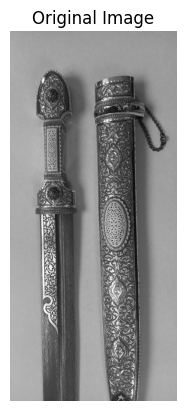

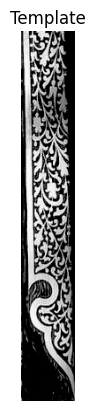

In [9]:
'''
Выводим обработанные изображения для визуализации
'''
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(templ, cv2.COLOR_BGR2RGB))
plt.title('Template')
plt.axis('off')
plt.show()

In [10]:
'''
TEMPLATE MATCHING - способ нахождения изображения по шаблону
------------------------------------------------------------
'''
def TemplateMatching(_image, _template, _isMask, _matchMetod, _treshold):
    image_dispaly = _image.copy()

    method_accepts_mask = (cv2.TM_SQDIFF == _matchMetod or _matchMetod == cv2.TM_CCORR_NORMED)

    if (_isMask and method_accepts_mask):
        result = cv2.matchTemplate(_image, _template, _matchMetod, None, _isMask)
    else:
        result = cv2.matchTemplate(_image, _template, _matchMetod)

    cv2.normalize(result, result, 0, 1, cv2.NORM_MINMAX, -1 )

    _minVal, _maxVal, minLoc, maxLoc = cv2.minMaxLoc(result, None)

    if (_matchMetod == cv2.TM_SQDIFF or _matchMetod == cv2.TM_SQDIFF_NORMED):
        matchLoc = minLoc
    else:
        matchLoc = maxLoc


    cv2.rectangle(image_dispaly, matchLoc, (matchLoc[0] + _template.shape[0], matchLoc[1] + _template.shape[1]), (0,0,0), 2, 8, 0 )
    cv2.rectangle(result, matchLoc, (matchLoc[0] + _template.shape[0], matchLoc[1] + _template.shape[1]), (0,0,0), 2, 8, 0 )

    # Отображение изображений
    cv2.imshow('Image Display', image_dispaly)
    cv2.imshow('Result', result)

    # Ожидание нажатия клавиши
    #cv2.imshow('Detected', image_dispaly)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    pass


#Разработать логику масок
#Доработать трешхолд
#Проблема в соотношении размера шаблона и изображения

In [11]:
'''
(***) указываются в способах где можно использовать маску
(min)/(max) абревеатура которая определяет что стремяться сделать методы, минимализировать сумму квадратов разниц между пикселями шаблона и изображения или максимизировать сходство между шаблоном и изображением

(min)***TM_SQDIFF - метод, при котором лучшим совпадением считается наименьшее значение суммы квадратов разниц значений пикселей.
(min)TM_SQDIFF_NORMED - метод, при котором лучшим совпадением считается наименьшее значение нормализованной суммы квадратов разниц значений пикселей.
(max)TM_CCORR - простая кросс-корреляция, которая считает сумму произведений шаблона на сегмент изображения.
(max)***TM_CCORR_NORMED - метод нормированной кросс-корреляции, где поэлементные произведения между шаблоном и изображением нормируются в диапазон от 0 до 1.
(max)TM_CCOEFF - метод, который вычитает среднее значение шаблона, вычисляя кросс-корреляцию без учёта среднего.
(max)TM_CCOEFF_NORMED - нормированная версия метода TM_CCOEFF, где результат кросс-корреляции без среднего нормируется в диапазон от -1 до 1.
'''

'''
Определение методов констант в библиотеке OpenCV
cv2.TM_SQDIFF = 0
cv2.TM_SQDIFF_NORMED = 1
cv2.TM_CCORR = 2
cv2.TM_CCORR_NORMED = 3
cv2.TM_CCOEFF = 4
cv2.TM_CCOEFF_NORMED = 5
'''

inner = 'TM_CCOEFF_NORMED' #Выбор способа Template matching
use_mask = False
mask = None
threshold = 0.8

arguments = {
    'TM_SQDIFF': (img,templ,use_mask,0,threshold),
    'TM_SQDIFF_NORMED':(img,templ,use_mask,1,threshold),
    'TM_CCORR': (img,templ,use_mask,2,threshold),
    'TM_CCORR_NORMED': (img,templ,use_mask,3,threshold),
    'TM_CCOEFF': (img,templ,use_mask,4,threshold),
    'TM_CCOEFF_NORMED': (img,templ,use_mask,5,threshold)
}

if isinstance(arguments[inner], tuple):
    TemplateMatching(*arguments[inner])

In [12]:
'''
KEYPOINT DETECTION
------------------------------------------------------------
'''

'\nKEYPOINT DETECTION\n------------------------------------------------------------\n'

In [13]:
'''
CONTOUR DETECTION
------------------------------------------------------------
'''

'\nCONTOUR DETECTION\n------------------------------------------------------------\n'

: 